# CTC Loss tutorial

#### Load some audio

In [ ]:
!wget 'https://github.com/nguyenvulebinh/kit-asr-praktikum/raw/main/resources/hello.wav'
!wget 'https://github.com/nguyenvulebinh/kit-asr-praktikum/raw/main/resources/world.wav'
!wget 'https://github.com/nguyenvulebinh/kit-asr-praktikum/raw/main/resources/door.wav'

--2022-12-20 20:28:08--  https://github.com/nguyenvulebinh/kit-asr-praktikum/raw/main/resources/hello.wav
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nguyenvulebinh/kit-asr-praktikum/main/resources/hello.wav [following]
--2022-12-20 20:28:09--  https://raw.githubusercontent.com/nguyenvulebinh/kit-asr-praktikum/main/resources/hello.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17438 (17K) [audio/wav]
Saving to: ‘hello.wav.1’

hello.wav.1         100%[===================>]  17.03K  --.-KB/s    in 0s      

2022-12-20 20:28:09 (106 MB/s) - ‘hello.wav.1’ saved [17438/17438]

--2022-12-20 2

#### Some of util funtions to visualize data

In [ ]:
import IPython
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

def draw_plot(emission, labels):
  matplotlib.rcParams["figure.figsize"] = [16, 16]
  fig, ax = plt.subplots()
  
  divider = make_axes_locatable(ax)
  cax = divider.append_axes('right', size='5%', pad=0.05)
  img = ax.matshow(emission.T, cmap='summer')
  fig.colorbar(img, cax=cax, orientation='vertical')

  for (i, j), z in np.ndenumerate(emission.T):
    ax.text(j, i, labels[i], ha='center', va='center', color='black', fontsize='x-large')
  
  ax.set_xlabel('Time steps', fontsize='x-large',)    
  ax.xaxis.set_label_position('top') 

  ax.set_ylabel('Vocabulary', fontsize='x-large',)    
  ax.yaxis.set_label_position('left') 
  
  plt.show()

#### Load a neural network (Wav2vec)

This network used to extract the vocabulary distribution corresponding to a fix-size slice from the audio input 

![](https://github.com/nguyenvulebinh/kit-asr-praktikum/blob/main/resources/wav2vec_ctc.png?raw=true)

In [ ]:
import torch
import torchaudio

torch.random.manual_seed(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Load model (wav2vec2 model)
bundle = torchaudio.pipelines.WAV2VEC2_ASR_BASE_960H
model = bundle.get_model().eval().to(device)
labels = bundle.get_labels()

Downloading: "https://download.pytorch.org/torchaudio/models/wav2vec2_fairseq_base_ls960_asr_ls960.pth" to /root/.cache/torch/hub/checkpoints/wav2vec2_fairseq_base_ls960_asr_ls960.pth


  0%|          | 0.00/360M [00:00<?, ?B/s]

In [ ]:
# Model architecture
model

In [ ]:
# Number of token in the vocabulary
len(labels)

29

#### Load an audio

In [ ]:
# A sample of the audio input
SPEECH_FILE = 'door.wav'
ground_truth = 'DOOR'
IPython.display.Audio(SPEECH_FILE)

In [ ]:
# Load audio
## TODO

#### Calculate the vocabulary distribution

Calculate the vocabulary distribution corresponding to the time step

In [ ]:
# Model forward

## TODO

# Format the output to the probability distribution

## TODO
# emission = 

In [ ]:
# The emission contains two dimensions. The first dimension is the number of time steps; the second is the number of tokens in the vocabulary.
emission.shape

torch.Size([22, 29])

#### Visualize the model output

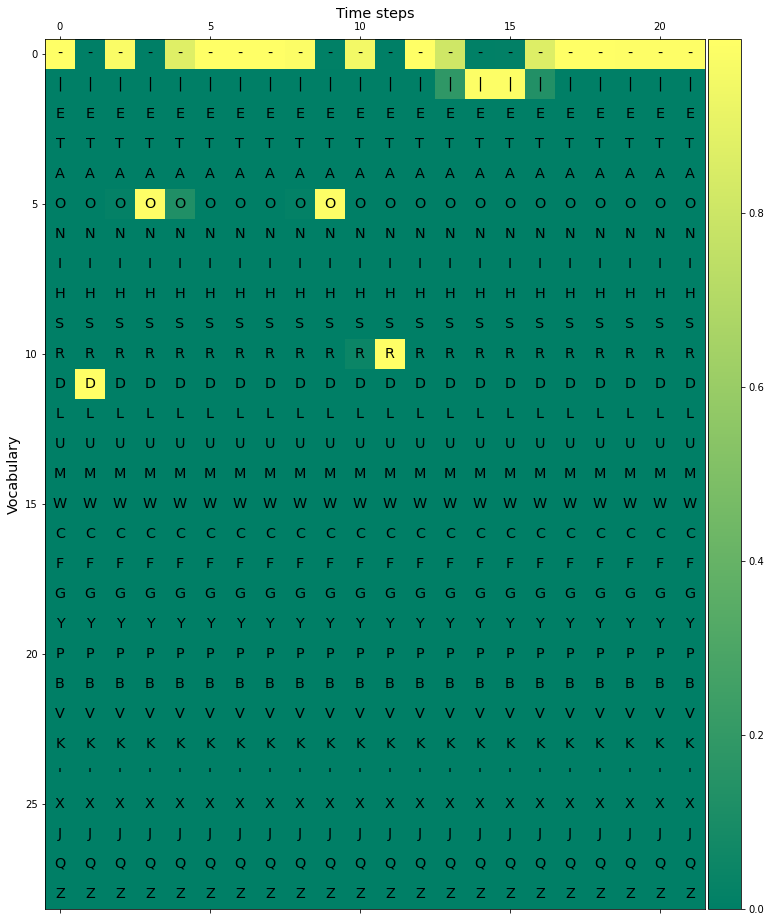

In [ ]:
draw_plot(emission, labels)

#### [Pytorch CTC loss](https://pytorch.org/docs/stable/generated/torch.nn.CTCLoss.html)

In [ ]:
from torch.nn import CTCLoss

In [ ]:
# Init ctc loss object
pytorch_ctc_loss = CTCLoss(blank=0, reduction='sum')

In [ ]:
# Input sequence length
## TODO
# input_length = 

# Target label by id
## TODO
# target_ids = 

# Target sequence length
## TODO
# target_length = 

In [ ]:
pytorch_ctc_loss_value = pytorch_ctc_loss(
    log_probs = torch.log(emission), 
    targets = torch.tensor(target_ids), 
    input_lengths = torch.tensor(input_length), 
    target_lengths = torch.tensor(target_length)
)

In [ ]:
pytorch_ctc_loss_value

tensor(10.4938)

### CTC loss from scratch

Our target is defind a function that can output a value equal with the output value of Pytorch CTC loss.

#### Defind the CTC target alignment

In [ ]:
# Token ϵ can be place before or after any token in the ground truth label. 
# CTC label = [ϵ, y1, ϵ, y2, ϵ, …, , ϵ, yU, ϵ]

## TODO
# ctc_gt = 
# ctc_gt_id = 

In [ ]:
ctc_gt

['-', 'D', '-', 'O', '-', 'O', '-', 'R', '-']

#### Reconstruct the probability matrix

We only care about the target label, so we can ignore the token that not exist in the label. Example here we only care about 4 tokens: **-**, **D**, **O**, **R**

![](https://github.com/nguyenvulebinh/kit-asr-praktikum/blob/main/resources/sample_ctc_prob_reconstruct.png?raw=true)

In [ ]:
# Collect token distribution over steps
## TODO
# target_distibution = 

In [ ]:
# The tensor contains two dimensions. The first dimension is target token; the second is the number of time steps.
target_distibution.shape

torch.Size([9, 22])

#### Visualize the target distibution

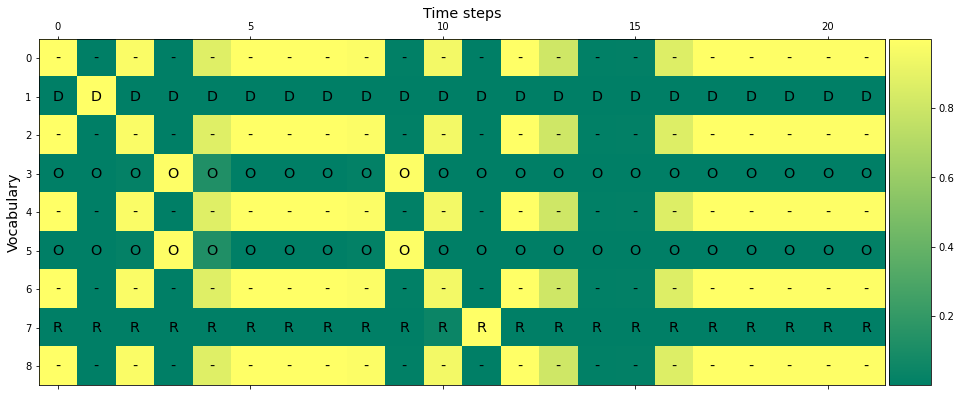

In [ ]:
draw_plot(target_distibution.T, ctc_gt)

#### Initialize the alpha table

![](https://github.com/nguyenvulebinh/kit-asr-praktikum/blob/main/resources/init_alpha_matrix.png?raw=true)

In [ ]:
## TODO
# ctc_gt_label_length = 
# num_time_steps = 

# Init the Alpha table have the same shape with the probability matrix. All value init value is zero
## TODO
# alpha_table = 

# Init first two token at the first time step in alpha matrix with the same value as in the probability table.
## TODO

#### Loop over alpha tabel position

**Case 1:**  When the token at current position is the same token in the previous two token.

![](https://github.com/nguyenvulebinh/kit-asr-praktikum/blob/main/resources/ctc_loss_case_1.png?raw=true)

**Case 2:**  When the token at current position is different from the token in the previous two token.

![](https://github.com/nguyenvulebinh/kit-asr-praktikum/blob/main/resources/ctc_loss_case_2.png?raw=true)

In [ ]:
for t in range(1, num_time_steps):
  for s in range(0, ctc_gt_label_length):
    # edge case
    if s == 0:
      ## TODO
      pass
      # alpha_previous = 
    elif s == 1:
      ## TODO
      pass
      # alpha_previous = 
    
    # Case 1
    elif ctc_gt[s] == ctc_gt[s-2]:
      ## TODO
      pass
      # alpha_previous = 

    # Case 2
    else:
      ## TODO
      pass
      # alpha_previous = 

    ## TODO
    # alpha_table[s][t] = 

#### Final CTC score

- Although CTC score calculate given for all nodes, we only care about the two final nodes in the bottom right
- The total probability is the sum of the two last nodes.
- The top above (black arrow) doesn't have any connection to the two final node
- The bottom (black arrow) all have the value is zero

![](https://github.com/nguyenvulebinh/kit-asr-praktikum/blob/main/resources/final_ctc_score.png?raw=true)

In [ ]:
## TODO
# final_probability = 

In [ ]:
final_probability

2.7707848396722745e-05

#### CTC loss value

The model’s parameters are tuned to minimize the negative log-likelihood

In [ ]:
## TODO
# ctc_loss_value = 

In [ ]:
ctc_loss_value

tensor(10.4938)